#**DBSCAN**


#Step 1 : Import Libraries



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import datasets


#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [36]:
X,y_true = make_blobs(n_samples=550, centers=5,cluster_std=0.70, random_state=0)


#Step 3 : Modeling The Data Using DBSCAN



In [37]:
db=DBSCAN(eps=0.5, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [38]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r', 'c', 'm']


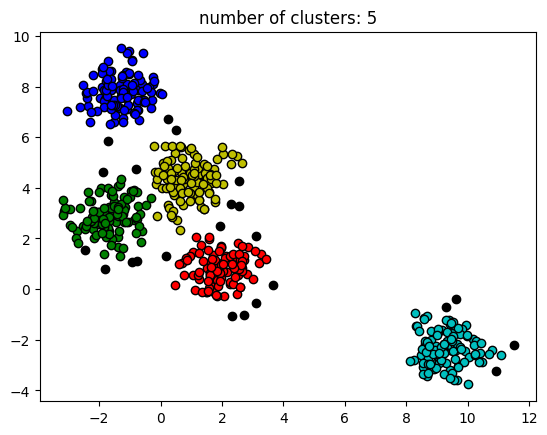

In [39]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r','c','m']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [31]:
from sklearn import metrics


In [40]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.64
Adjusted Rand Index: 0.93


#**Well Done :)**